# Integration of SVM and MVO 

This notebook computes and visualizes the results of the computational experiments

In [1]:
import numpy as np
from pandas.tseries.offsets import Day, MonthBegin
pth = 'cache/Experiments/'
cache_path = 'cache/'
img_path = "Images/"
from python.packages import *
from python.analysis_tools import *
%matplotlib inline

### Alternating Direction Method Effectiveness (Solution quality and time) for the full set of problems described in notebook ADM Comparison NoteBook Timing.ipynb

In [2]:
###import pickle files
import pickle
dpi_setting = 150
#single penalization parameter
with open(pth + "svm_adm_mvp_lrg_v3.pkl",'rb') as fp:
  (adm1_wgts, adm1_obj_inf, adm1_svm_wgts, adm1_z, adm1_xi) = pickle.load(fp)
#individual penalization parameter
with open(pth + "svm_adm2_mvp_lrg_v3.pkl",'rb') as fp:
  (adm2_wgts, adm2_obj_inf, adm2_svm_wgts, adm2_z, adm2_xi)  = pickle.load(fp)
#individual penalization parameter with random 
with open(pth + "svm_adm2_mvp_lrg_random.pkl",'rb') as fp:
  (rand_wgts, rand_obj_inf, rand_svm_wgts, rand_z, rand_xi)  = pickle.load(fp)
#SVM Exact
with open(pth + "svm_exact_mvp_lrg_v3.pkl",'rb') as fp:
  (exact_wgts, exact_obj_inf, exact_svm_wgts, exact_z, exact_xi) = pickle.load(fp)

#wrds_svm = pd.read_pickle(cache_path + 'WRDS_ASOF.pkl')
tics = list(exact_wgts.columns)
dates = exact_wgts.index
print("valid tickers:", tics)

valid tickers: ['AAPL', 'ABC', 'ABMD', 'ABT', 'ADBE', 'ADI', 'ADM', 'ADP', 'ADSK', 'AEE', 'AEP', 'AES', 'AJG', 'AKAM', 'ALB', 'ALK', 'AMAT', 'AMD', 'AME', 'AMGN', 'AMT', 'AMZN', 'ANSS', 'AON', 'AOS', 'APA', 'APD', 'APH', 'ATO', 'AVY', 'AZO', 'BA', 'BAX', 'BBY', 'BDX', 'BKNG', 'BLL', 'BMY', 'BSX', 'BWA', 'CAG', 'CAH', 'CAT', 'CCI', 'CCL', 'CDNS', 'CERN', 'CHD', 'CHRW', 'CI', 'CL', 'CLX', 'CMCSA', 'CMI', 'CMS', 'CNP', 'COO', 'COP', 'COST', 'CPB', 'CPRT', 'CSCO', 'CSX', 'CTAS', 'CTSH', 'CTXS', 'CVS', 'CVX', 'D', 'DD', 'DGX', 'DHR', 'DIS', 'DISH', 'DLTR', 'DOV', 'DRI', 'DTE', 'DUK', 'DVA', 'DVN', 'DXC', 'EA', 'EBAY', 'ECL', 'ED', 'EFX', 'EIX', 'EL', 'EMN', 'EMR', 'EOG', 'ES', 'ETN', 'ETR', 'EVRG', 'EXC', 'EXPD', 'F', 'FAST', 'FCX', 'FDX', 'FE', 'FFIV', 'FISV', 'FLS', 'FMC', 'GD', 'GIS', 'GLW', 'GPC', 'GPS', 'GWW', 'HAL', 'HAS', 'HD', 'HES', 'HFC', 'HOG', 'HOLX', 'HON', 'HP', 'HPQ', 'HRB', 'HRL', 'HSIC', 'HSY', 'HUM', 'IBM', 'IDXX', 'IEX', 'IFF', 'INCY', 'INTC', 'INTU', 'IP', 'IPG', 'IRM', 

### Investigate Infeasibility of PADM methods

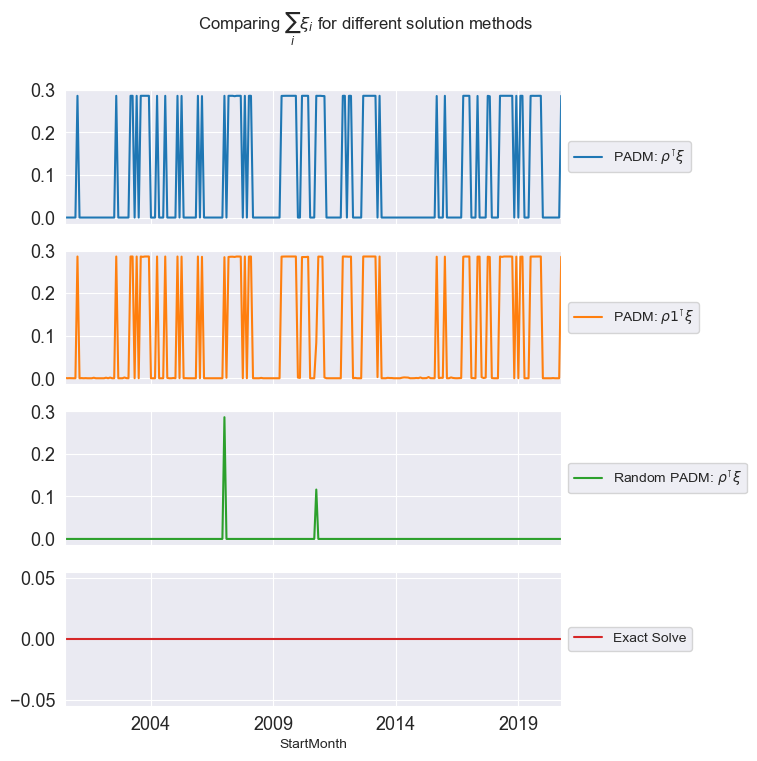

In [3]:
pd.DataFrame(np.array([adm2_xi.sum(axis=1), adm1_xi.sum(axis=1), rand_xi.sum(axis=1), exact_xi.sum(axis=1)]).transpose(), 
             columns = [r'PADM: $\rho^{\intercal} \xi$', r'PADM: $\rho 1^{\intercal}\xi$', r'Random PADM: $\rho^{\intercal} \xi$',  "Exact Solve"], 
             index = adm2_xi.sum(axis=1).index).plot(subplots = True, legend = False,
                                                     title = r'Comparing $\sum_i \xi_i$ for different solution methods', figsize = (8,8),fontsize = 13)
for ax in plt.gcf().axes:
  box = ax.get_position()
  ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
  # Put a legend to the right of the current axis
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.savefig(img_path + "p6.svg",dpi = dpi_setting)

In [4]:
print("Number of instances where the multiple penalty formulation finished first: ", (adm2_obj_inf['Run-Time'] < adm1_obj_inf['Run-Time']).sum())
print("Number of instances: ", (adm2_obj_inf['Run-Time'] < adm1_obj_inf['Run-Time']).count())

Number of instances where the multiple penalty formulation finished first:  237
Number of instances:  244


In [5]:
adm_feasible = adm2_xi.sum(axis=1) < 10**(-9)
print("Number of instances where the PADM found an SVM feasible solution: ", sum(adm_feasible))
pd.DataFrame(adm_feasible.reset_index()[~adm_feasible.values])

Number of instances where the PADM found an SVM feasible solution:  162


,StartMonth,0
6,2001-01-01,False
25,2002-08-01,False
32,2003-03-01,False
33,2003-04-01,False
35,2003-06-01,False
...,...,...
230,2019-09-01,False
231,2019-10-01,False
232,2019-11-01,False
233,2019-12-01,False


In [6]:
rand_feasible = rand_xi.sum(axis=1) < 10**(-8)
print("Number of instances where the Randomized PADM found an SVM feasible solution: ", sum(rand_feasible))
pd.DataFrame(adm_feasible.reset_index()[~rand_feasible.values])

Number of instances where the Randomized PADM found an SVM feasible solution:  242


,StartMonth,0
78,2007-01-01,False
123,2010-10-01,False


### Solution Quality: MIP Gap for feasible instances by comparing $x^{\intercal} \Sigma x + \frac{1}{2} ||w||^2 $ for the exact solution method and the PADM approaches (random and deterministic)

PADM
Median MIP Gap:  6.334454669405052
95% MIP Gap:  74.25439154966841
70% MIP Gap:  12.604756570699829
5% MIP Gap:  0.48712752526842795
Random PADM
Median MIP Gap:  3.8611533171674934
95% MIP Gap:  88.86405028456755
70% MIP Gap:  10.304878601538627
5% MIP Gap:  0.37221612239988117


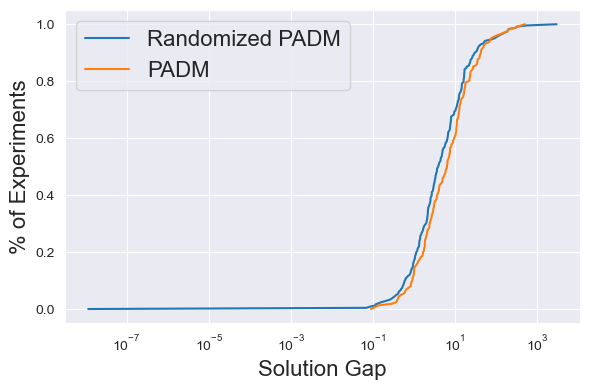

In [7]:
exact_obj = exact_obj_inf.Risk + 0.5*exact_obj_inf.Margin 
adm2_obj = adm2_obj_inf.Risk + 0.5*adm2_obj_inf.Margin 
rand_obj = rand_obj_inf.Risk + 0.5*rand_obj_inf.Margin 

adm_MIP = print_MIP(adm2_obj_inf, exact_obj_inf, adm_feasible, name = "PADM")
rand_MIP = print_MIP(rand_obj_inf, exact_obj_inf, rand_feasible, name = "Random PADM")

rand_prob = np.linspace(0,1, len(rand_MIP))
adm_prob = np.linspace(0,1, len(adm_MIP))


adm_dt_cdf = np.sort(adm_MIP)
rand_dt_cdf = np.sort(rand_MIP)
plt.figure(figsize = (6,4))
plt.plot(rand_dt_cdf, rand_prob, label = "Randomized PADM")
plt.plot(adm_dt_cdf, adm_prob, label = "PADM")
plt.xscale('log')
plt.legend(fontsize = 16)
# plt.title("Solution Gap CDF: Randomized vs Deterministic PADM")
plt.ylabel("% of Experiments",fontsize = 16)
plt.xlabel("Solution Gap",fontsize = 16)
plt.tight_layout()
plt.savefig(img_path + "p8.svg", dpi = dpi_setting)

In [8]:
sum(rand_dt_cdf < 0.1)

3

In [9]:
sum(adm_dt_cdf < 0.1)

1

In [10]:
rand_obj_inf.Margin

StartMonth
2000-07-01    0.006986
2000-08-01    0.001519
2000-09-01    0.013581
2000-10-01    0.007877
2000-11-01    0.000926
                ...   
2020-06-01    0.026610
2020-07-01    0.000898
2020-08-01    0.000475
2020-09-01    0.005399
2020-10-01    0.008210
Name: Margin, Length: 244, dtype: float64

In [11]:
exact_obj_inf.Margin 

StartMonth
2000-07-01    0.000257
2000-08-01    0.000294
2000-09-01    0.000524
2000-10-01    0.000429
2000-11-01    0.000197
                ...   
2020-06-01    0.000328
2020-07-01    0.000169
2020-08-01    0.000131
2020-09-01    0.000161
2020-10-01    0.000205
Name: Margin, Length: 244, dtype: float64

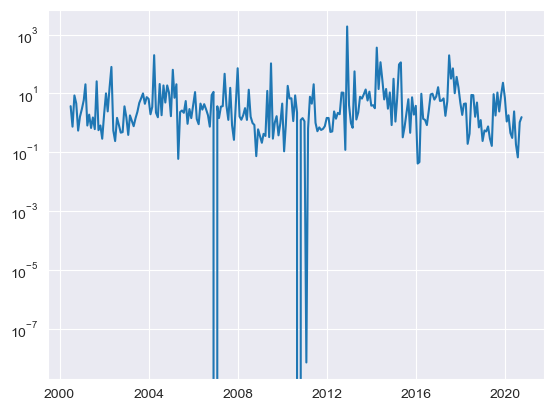

In [12]:
plt.plot((rand_obj - exact_obj)/exact_obj)
plt.yscale('log')

#### Metrics for Comparison

$$ \gamma_1 = \frac{1}{T} \sum_{t = 1} ^ T \frac{1}{N}||x_t^{\text{ADM}} - x_t^{\text{Exact}}||_1$$

$$\gamma_2 =  \max_{t = 1 \in [T]} \frac{1}{N} ||x_t^{\text{ADM}} - x_t^{\text{Exact}}||_1$$

$$\gamma_3 =  \frac{1}{T} \sum_{t = 1} ^ T  ||x_t^{\text{ADM}} - x_t^{\text{Exact}}||_{\infty}$$

$$\gamma_4 =  \max_{t = 1 \in [T]} ||x_t^{\text{ADM}} - x_t^{\text{Exact}}||_{\infty}$$

$$\gamma_5 =   \frac{1}{T} \sum_{t = 1} ^ T Q_{95}(\{|x_t^{\text{ADM}} - x_t^{\text{Exact}}|_i \}_{i=1}^N)$$

In [13]:
gamma1 = 100*np.abs(adm2_wgts - exact_wgts).mean(axis = 1).mean() #average l1 norm 
gamma2 = 100*np.abs(adm2_wgts - exact_wgts).mean(axis = 1).max() #worst case l1 norm
gamma3 = 100*np.abs(adm2_wgts - exact_wgts).max(axis = 1).mean() #average worst case difference
gamma4 = 100*np.abs(adm2_wgts - exact_wgts).max(axis = 1).max() #worst case difference
gamma5 = 100*np.percentile(np.abs(adm2_wgts - exact_wgts), 95, axis = 1).mean() #worst case difference

pd.DataFrame([gamma1,gamma2,gamma3,gamma4], index = ["$\gamma_1$", "$\gamma_2$", "$gamma_3$", "$\gamma_4$"], columns = ["Solution Quality Metrics"]).transpose()

,$\gamma_1$,$\gamma_2$,$gamma_3$,$\gamma_4$
Solution Quality Metrics,0.272362,0.580722,11.355996,41.229305


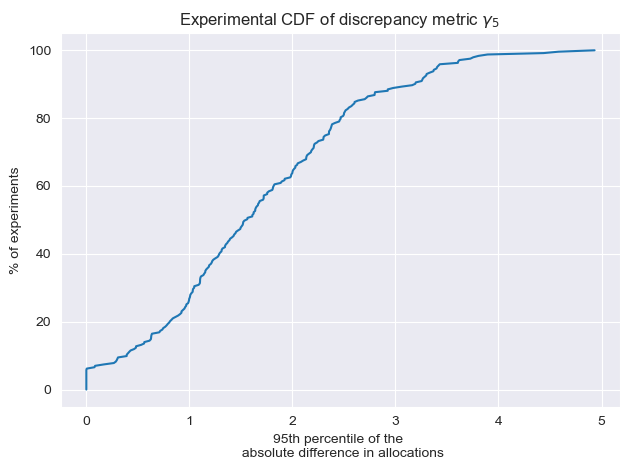

In [14]:
#raw_diffs = np.sort((adm_wgts - exact_wgts).values.flatten())
raw_diffs95 = np.sort(np.percentile(100*np.abs(adm2_wgts - exact_wgts), 95, axis = 1))
raw_diffs99 = np.sort(np.percentile(100*np.abs(adm2_wgts - exact_wgts), 99, axis = 1))
raw_diffs80 = np.sort(np.percentile(100*np.abs(adm2_wgts - exact_wgts), 80, axis = 1))
raw_diffs50 = np.sort(np.percentile(100*np.abs(adm2_wgts - exact_wgts), 50, axis = 1))

probs = np.linspace(0,1,len(raw_diffs95))
# plt.plot(probs, raw_diffs99)

plt.plot(raw_diffs95, 100*probs)
plt.title("Experimental CDF of discrepancy metric $\gamma_5$ ")
plt.ylabel("% of experiments")
plt.xlabel("95th percentile of the \n absolute difference in allocations");
plt.tight_layout()
#plt.plot(probs,raw_diffs80);
# plt.plot(probs,raw_diffs50)
# u = np.percentile(np.abs(raw_diffs), 95)
# print(u)

### Selection Accuracy
$1 - \frac{|z^{\text{PADM}} - z^{\text{exact}}|}{\sum_i z_i^{\text{PADM}} + z_i^{\text{exact}}}$
Reported for all instances

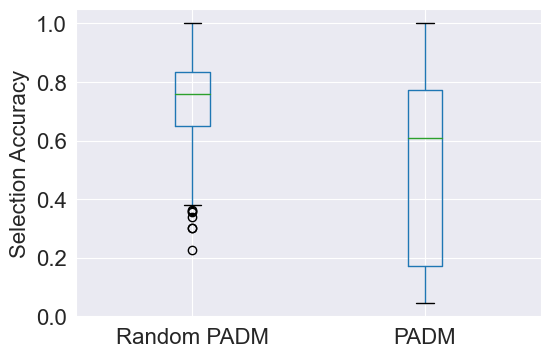

In [15]:
S_rand = 1 - np.abs(rand_z - exact_z).sum(axis=1)/(rand_z + exact_z).sum(axis=1)
S_adm = 1 - np.abs(adm2_z - exact_z).sum(axis=1)/(adm2_z + exact_z).sum(axis=1)

pd.DataFrame({'Random PADM': S_rand, 'PADM': S_adm}).boxplot(figsize = (6,4), fontsize = 16);
plt.ylabel("Selection Accuracy", fontsize = 16)
plt.savefig(img_path + "p9.svg", dpi = dpi_setting)

In [16]:
print("Selection Accuracy: Median ", np.percentile(S_rand,50))
print("Selection Accuracy: Median ", np.percentile(S_adm,50))
S_adm

Selection Accuracy: Median  0.7600873870581435
Selection Accuracy: Median  0.6073688917222488


StartMonth
2000-07-01    0.771765
2000-08-01    0.913526
2000-09-01    0.829040
2000-10-01    0.979775
2000-11-01    0.961276
                ...   
2020-06-01    0.773481
2020-07-01    0.644258
2020-08-01    0.676218
2020-09-01    0.775385
2020-10-01    0.099585
Length: 244, dtype: float64

#### Timing 

Average time 

and run-time distributions

In [17]:
adm_ave_time = adm2_obj_inf['Run-Time'].mean()
rand_ave_time = rand_obj_inf['Run-Time'].mean()
exact_ave_time = exact_obj_inf['Run-Time'].mean()
print("Mean Time")
print("Exact: ", exact_ave_time)
print("PADM: ", adm_ave_time)
print("Randomized PADM: ", rand_ave_time)

adm_med_time = np.percentile(adm2_obj_inf['Run-Time'],50)
rand_med_time = np.percentile(rand_obj_inf['Run-Time'],50)
exact_med_time = np.percentile(exact_obj_inf['Run-Time'],50)
print("Median Time")
print("Exact: ", exact_med_time)
print("ADM: ", adm_med_time)
print("Randomized PADM: ", rand_med_time)

adm_med_time = np.percentile(adm2_obj_inf['Run-Time'],95)
rand_med_time = np.percentile(rand_obj_inf['Run-Time'],95)
exact_med_time = np.percentile(exact_obj_inf['Run-Time'],95)
print("95th Percentile Time")
print("Exact", exact_med_time)
print("ADM", adm_med_time)
print("Randomized PADM: ", rand_med_time)


Mean Time
Exact:  77.74823932960385
PADM:  26.960849779551147
Randomized PADM:  57.853854004476894
Median Time
Exact:  70.50486743450165
ADM:  28.294347405433655
Randomized PADM:  59.916078329086304
95th Percentile Time
Exact 172.1780617594719
ADM 39.535423278808594
Randomized PADM:  79.96445506811142


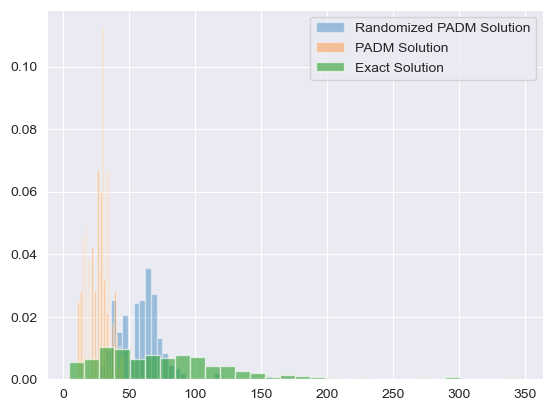

In [18]:
plt.hist(rand_obj_inf['Run-Time'], bins = 30, density = True, label = "Randomized PADM Solution", alpha = 0.4);
plt.hist(adm2_obj_inf['Run-Time'], bins = 30, density = True, label = "PADM Solution", alpha = 0.4);
plt.hist(exact_obj_inf['Run-Time'], bins = 30, density = True, label = "Exact Solution",alpha = 0.6);
plt.legend();

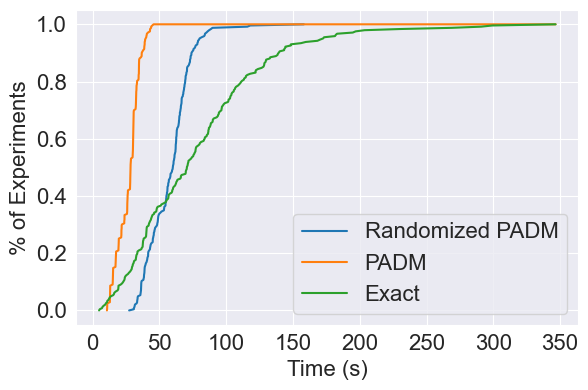

In [19]:
prob = np.linspace(0,1, len(exact_obj_inf['Run-Time']))
prob2 = np.zeros(len(prob)+1)
prob2[:len(prob)] = prob
prob2[-1] = 1

adm_dt_cdf = np.sort(np.array(adm2_obj_inf['Run-Time'].tolist()+[max(exact_obj_inf['Run-Time'])]))
rand_dt_cdf = np.sort(np.array(rand_obj_inf['Run-Time'].tolist()+[max(rand_obj_inf['Run-Time'])]))

exact_dt_cdf = np.sort(np.array(exact_obj_inf['Run-Time']))

plt.figure(figsize = (6,4))
plt.plot(rand_dt_cdf, prob2, label = "Randomized PADM")
plt.plot(adm_dt_cdf, prob2, label = "PADM")

plt.plot(exact_dt_cdf, prob, label = "Exact")
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize = 16)
#plt.title("Run-time CDF: ADM vs. Exact Solution")
plt.ylabel("% of Experiments",fontsize = 16)
plt.xlabel("Time (s)",fontsize = 16)
plt.tight_layout()
plt.savefig(img_path + "p10.svg", dpi = dpi_setting)

### Performance Ratio Analysis
$\frac{t_i^{m}}{\text{min} \{t_i^a: a \in M \} }$ where $M = \{ \text{Random PADM},\  \text{ADM},\  \text{Exact}\}$

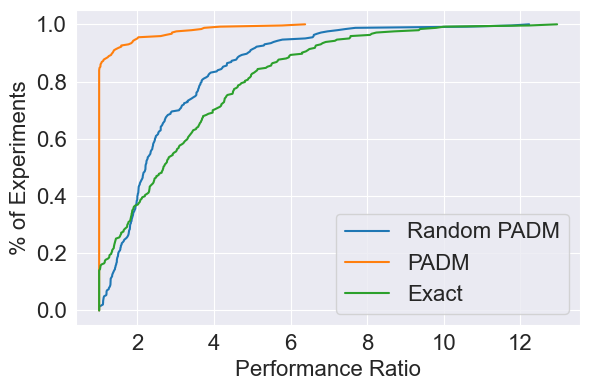

In [20]:
times = pd.DataFrame({"Random PADM" : rand_obj_inf['Run-Time'], "PADM":adm2_obj_inf['Run-Time'], 'Exact': exact_obj_inf['Run-Time']})
performance_ratio = times.divide(times.min(axis=1), axis=0 )
#performance_ratio.plot()
prob = np.linspace(0,1, len(performance_ratio))
plt.figure(figsize = (6,4))
for col in performance_ratio.columns:
  cdf = performance_ratio[col].sort_values()
  plt.plot(cdf,prob, label = col)

plt.ylabel("% of Experiments", fontsize = 16)
plt.xlabel("Performance Ratio", fontsize = 16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize = 16)
plt.tight_layout()
plt.savefig(img_path + "p11.svg", dpi = dpi_setting)